<a href="https://colab.research.google.com/github/beepboop1212/Pract1c3/blob/main/weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

file_path = "/content/drive/MyDrive/weather.csv"
df = pd.read_csv(file_path)

print(df.head())


         time  tavg  tmin  tmax  prcp
0  2004-01-01   9.8   NaN  14.6   0.0
1  2004-01-02  10.2   4.2  17.0   0.0
2  2004-01-03   9.6   NaN  15.9   0.0
3  2004-01-04   8.6   5.0  14.7   0.0
4  2004-01-05   9.0   4.6  13.5   0.0


In [5]:
df.shape

(6851, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6851 entries, 0 to 6850
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    6781 non-null   object 
 1   tavg    6779 non-null   float64
 2   tmin    6289 non-null   float64
 3   tmax    6687 non-null   float64
 4   prcp    2098 non-null   float64
dtypes: float64(4), object(1)
memory usage: 267.7+ KB


In [7]:
df.isnull().sum()

time      70
tavg      72
tmin     562
tmax     164
prcp    4753
dtype: int64

In [8]:
# prompt: how to drop null values from only 1 column and remove that entire row

df1 = df.dropna(subset=['tmax'], how='all')
df1.shape


(6687, 5)

In [9]:
# df2['precipitation'] = df2['precipitation'].replace(0, 0.001)

In [10]:
data_dup = df.duplicated().any()
print(data_dup)

True


In [11]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Text(0.5, 0, 'parameters')

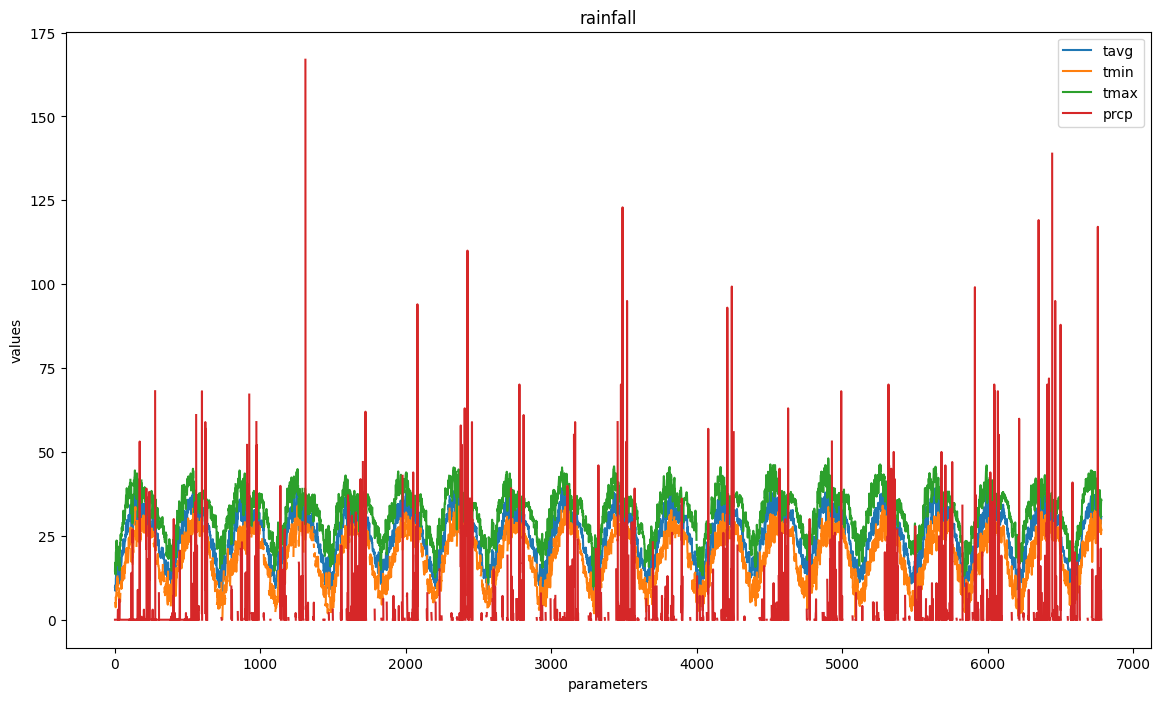

In [12]:
df.plot(kind='line',figsize=(14,8))
plt.title('rainfall')
plt.ylabel('values')
plt.xlabel('parameters')


In [13]:
train_dates = pd.to_datetime(df1['time'])


train_dates


0      2004-01-01
1      2004-01-02
2      2004-01-03
3      2004-01-04
4      2004-01-05
          ...    
6776   2022-07-21
6777   2022-07-22
6778   2022-07-23
6779   2022-07-24
6780   2022-07-25
Name: time, Length: 6687, dtype: datetime64[ns]

In [14]:
cols = list(df1)[3:4]
print(cols)

['tmax']


<Axes: >

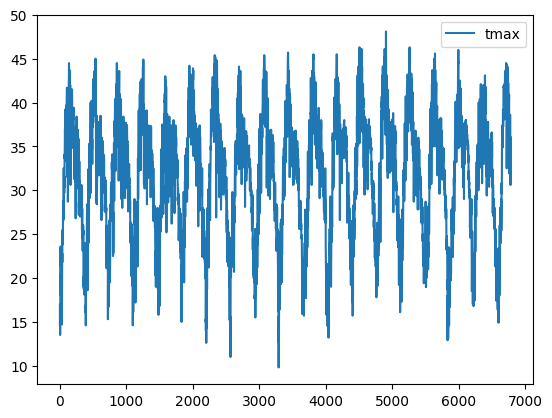

In [15]:
training_df = df1[cols].astype(float)
plot_df = training_df
plot_df.plot.line()

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(training_df)
scaled_df = scaler.transform(training_df)


In [17]:
trainX = []
trainY = []
n_past = 20
n_fut = 100

for i in range(n_past, len(scaled_df) - n_fut + 1):
    trainX.append(scaled_df[i - n_past:i, 0:scaled_df.shape[1]])
    trainY.append(scaled_df[i + n_fut - 1:i + n_fut, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (6568, 20, 1).
trainY shape == (6568, 1).


In [18]:
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 32)            4352      
                                                                 
 dropout (Dropout)           (None, 20, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 32)            8320      
                                                                 
 dropout_1 (Dropout)         (None, 20, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [21]:
history = model.fit(trainX, trainY, epochs=30, batch_size=5, validation_split=0.2, verbose=1)

Epoch 1/30
1051/1051 [==============================] - 26s 25ms/step - loss: 0.3444 - val_loss: 0.4120
Epoch 2/30
1051/1051 [==============================] - 25s 24ms/step - loss: 0.3413 - val_loss: 0.4177
Epoch 3/30
1051/1051 [==============================] - 23s 22ms/step - loss: 0.3260 - val_loss: 0.3309
Epoch 4/30
1051/1051 [==============================] - 25s 24ms/step - loss: 0.3204 - val_loss: 0.3313
Epoch 5/30
1051/1051 [==============================] - 25s 23ms/step - loss: 0.3185 - val_loss: 0.3201
Epoch 6/30
1051/1051 [==============================] - 24s 23ms/step - loss: 0.3151 - val_loss: 0.3318
Epoch 7/30
1051/1051 [==============================] - 25s 24ms/step - loss: 0.3130 - val_loss: 0.3303
Epoch 8/30
1051/1051 [==============================] - 23s 22ms/step - loss: 0.3057 - val_loss: 0.3578
Epoch 9/30
1051/1051 [==============================] - 27s 26ms/step - loss: 0.2989 - val_loss: 0.2855
Epoch 10/30
1051/1051 [==============================] - 24s 23m

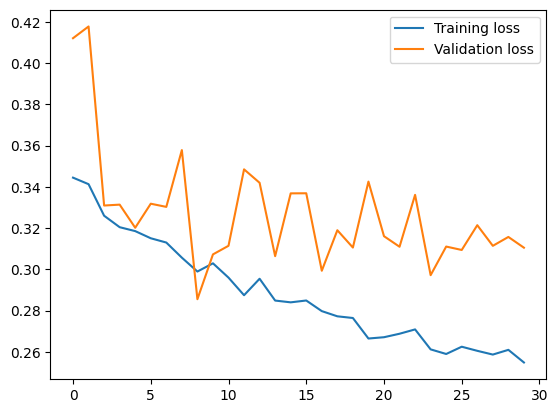

In [22]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [23]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_td = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_past = 1
n_days_for_prediction = 600

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_td).tolist()
prediction = model.predict(trainX[-n_days_for_prediction:])
prediction_copies = np.repeat(prediction, training_df.shape[1], axis=1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
df_forecast = pd.DataFrame({'time':np.array(forecast_dates), 'tmax':y_pred_future})
df_forecast['time'] = pd.to_datetime(df_forecast['time'])


# plt.figure(figsize=(10, 5))
# plt.plot(df_forecast['time'], df_forecast['tmax'], label='Forecast', color='green')
# plt.xlabel('Date')
# plt.ylabel('Temperature (tmax)')
# plt.title('Temperature Forecast')
# plt.legend()
# plt.grid(True)
# plt.show()


19/19 [==============================] - 1s 7ms/step


<ipython-input-24-349c4e08c8a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['time'] = pd.to_datetime(original['time'])


<Axes: xlabel='time', ylabel='tmax'>

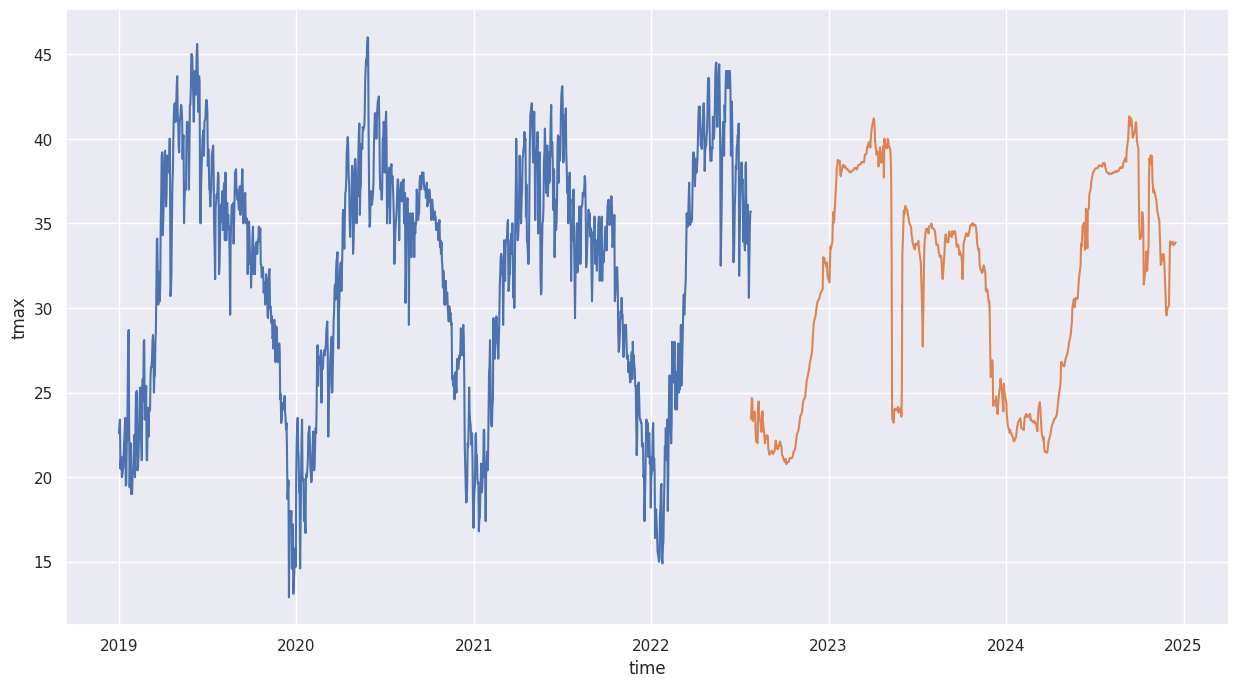

In [24]:
import seaborn as sns
original = df1[['time', 'tmax']]
original['time'] = pd.to_datetime(original['time'])
original = original.loc[original['time']>='2019-01-01']
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(x='time', y='tmax', data=original)
sns.lineplot(x='time', y='tmax', data=df_forecast)
